# **Ejercicios de NumPy**

In [2]:
%pylab inline
import numpy as np

Populating the interactive namespace from numpy and matplotlib


# Pregunta 1

Crea los siguientes arreglos con los tipos correctos.


* Un arreglo de $5 \times 5$ cuya diagonal sean $[1.0, 2.0, 3.0, 4.0, 5.0]$ 
* Un arreglo de $4 \times 4$ cuyo último renglón sea $[1,2,3,4]$ y el resto sean $0$.

In [61]:
A = np.matrix([[1,0,0,0,0],
              [0,2,0,0,0],
              [0,0,3,0,0],
              [0,0,0,4,0],
              [0,0,0,0,5]])
A

matrix([[1, 0, 0, 0, 0],
        [0, 2, 0, 0, 0],
        [0, 0, 3, 0, 0],
        [0, 0, 0, 4, 0],
        [0, 0, 0, 0, 5]])

In [60]:
B = np.matrix([[0,0,0,0],
              [0,0,0,0],
              [0,0,0,0],
              [1,2,3,4],])
B

matrix([[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [1, 2, 3, 4]])

# Pregunta 2

En este ejercicio realizaremos una criba de Eratóstenes
**Nota**: Ejercicio basado en el presentado en `C4P`.

(a) Crea un arreglo de booleanos de shape (100,), con todos sus elementos True. El índice representa el número.

In [3]:
bool_arr = np.ones((100,), dtype=bool)
print (bool_arr)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]


(b) "Tacha" los elementos 0 y 1.

In [11]:
bool_arr[0]=False
bool_arr[1]=False

In [13]:
bool_arr

array([False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

(c) Para cada entero subsiguiente, tacha sus múltiplos. Una manera de hacerlo es el código que se muestra. Explica que hace el código, sobretodo explica que hace el slicing.

In [14]:
N_max = int(np.sqrt(len(bool_arr)))
for j in range(2, N_max):
    bool_arr[2*j::j] = False

Primero calcula la raíz cuadrada de lo que mide el arreglo y tacha con falso los elementos que son múltiplos de j, es decir, los que no son primos. La j debe ser menor a la raíz cuadrada que se obtiene antes. 

Slicing: Va desde 2 por j hasta la j. Se van dando saltos de j en j para ir eliminando los que no son primos. Esto psa cada vez que se encuentra a un primo. 

(d) Mira la documentacion de np.nonzero para imprimir todos los números primos.

In [15]:
np.nonzero(bool_arr)

(array([ 2,  3,  5,  7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59,
        61, 67, 71, 73, 79, 83, 89, 97]),)

(e) Encapsula lo que acabamos de hacer en una función llamada criba_eratostenes, que reciba como argumento maximo el cual representa el tamaño del array. Muestra el resultado para maximo = {10, 100, 200}, usando un for.

In [18]:
def criba_eratostenes(n):
    bool_arr = np.ones((n,), dtype=bool)
    bool_arr[0]=False
    bool_arr[1]=False
    N_max = int(np.sqrt(len(bool_arr)))
    for j in range(2, N_max):
        bool_arr[2*j::j] = False
    print (np.nonzero(bool_arr))
    
resultado = [10,100,200]
for k in resultado:
    print ("Los números primos que son menores a", k, "son: ")
    criba_eratostenes(k)

Los números primos que son menores a 10 son: 
(array([2, 3, 5, 7, 9]),)
Los números primos que son menores a 100 son: 
(array([ 2,  3,  5,  7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59,
       61, 67, 71, 73, 79, 83, 89, 97]),)
Los números primos que son menores a 200 son: 
(array([  2,   3,   5,   7,  11,  13,  17,  19,  23,  29,  31,  37,  41,
        43,  47,  53,  59,  61,  67,  71,  73,  79,  83,  89,  97, 101,
       103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167,
       173, 179, 181, 191, 193, 197, 199]),)


# Pregunta 3

Crea un cubo rubik, partiendo de un arreglo de ceros y usando slicing dibuja cada una de las caras como si estuviera resuelto (cada color un entero a partir del $1$). Muestra con indexing que está resuelto (es decir, imprime las seis caras). ¿Cuántos elementos del arreglo quedaron en $0$?

In [62]:
cubo=np.zeros((6,3,3)).astype(int)
for k in range (6):
    cubo[k]=1+k
print(cubo)

[[[1 1 1]
  [1 1 1]
  [1 1 1]]

 [[2 2 2]
  [2 2 2]
  [2 2 2]]

 [[3 3 3]
  [3 3 3]
  [3 3 3]]

 [[4 4 4]
  [4 4 4]
  [4 4 4]]

 [[5 5 5]
  [5 5 5]
  [5 5 5]]

 [[6 6 6]
  [6 6 6]
  [6 6 6]]]


# Pregunta 4

El Sudoku es un pasatiempo que consiste en un arreglo $9 \times 9$ de celdas, con dígitos del 1 al 9, de tal manera que no se repiten valores en cada columna, cada renglón y en cada subarreglo de $3\times 3$.

(a) Crea una función llamada correcto que reciba un array $1d$ de tamaño 9 e indique si está completo o no (i.e. incluye los números del 1 al 9.

(b) Crea una función llamada descomponer3x3 que reciba un array de enteros de $9\times 9$ y lo separe en sus 9 subarreglos $3\times3$.

(c) Crea la función esSolucion que recibe un array de $9\times 9$ y devuelve si es o no solución del sudoku.



In [7]:
def correcto(array):
    if array.size != 9:
        raise Exception("Forma equivocada")
        
    if sorted(array) == [1,2,3,4,5,6,7,8,9]:
        return True
    return False

def descomponer3x3(array):
    if array.shape != (9,9):
        raise Exception("Forma equivocada")
        
    subarreglos = []
    for desc_vert in np.vsplit(array,3):
        for subarreglo in np.hsplit(desc_vert,3):
            subarreglos.append(subarreglo)
    return subarreglos

def esSolucion(array):
    if array.shape != (9,9):
        raise Exception("Forma equivocada")
    
    for row in array:
        if not correcto(row):
            return False

    for col in array.T:
        if not correcto(col):
            return False
    
    for subarreglo in descomponer3x3(array):
        if not correcto(subarreglo.reshape(9)):
            return False
    return True

In [8]:
# Función que construye una solución de Sudoku 

def construye_solucion(arr,row,col):
    if col == 9:
        col = 0
        row = row + 1
        if row == 9:
            return arr
    
    for posible_num in range(1,10):
        
        valid = True
        
        for num in arr[row,:]:
            if num == posible_num:
                valid = False
                
        for num in arr[:, col]:
            if num == posible_num:
                valid = False
                
        for num in descomponer3x3(arr)[int(row / 3)*3 + int(col / 3)].reshape(9):
            if num == posible_num:
                valid = False
                
        if valid:
            arr[row,col] = posible_num
            value = construye_solucion(arr, row, col+1)
            if value is not None:
                return value
            arr[row,col] = 0
            
solucion = construye_solucion(np.zeros((9,9)),0,0)
solucion

array([[1., 2., 3., 4., 5., 6., 7., 8., 9.],
       [4., 5., 6., 7., 8., 9., 1., 2., 3.],
       [7., 8., 9., 1., 2., 3., 4., 5., 6.],
       [2., 1., 4., 3., 6., 5., 8., 9., 7.],
       [3., 6., 5., 8., 9., 7., 2., 1., 4.],
       [8., 9., 7., 2., 1., 4., 3., 6., 5.],
       [5., 3., 1., 6., 4., 2., 9., 7., 8.],
       [6., 4., 2., 9., 7., 8., 5., 3., 1.],
       [9., 7., 8., 5., 3., 1., 6., 4., 2.]])

In [9]:
esSolucion(solucion)

True

In [10]:
#Este es un ejemplo de una solución que es falsa, se cambio el último número 
#de la que está arriba, podemos darnos cuenta que por eso sale false

mala = np.array([[1., 2., 3., 4., 5., 6., 7., 8., 9.],
                   [4., 5., 6., 7., 8., 9., 1., 2., 3.],
                   [7., 8., 9., 1., 2., 3., 4., 5., 6.],
                   [2., 1., 4., 3., 6., 5., 8., 9., 7.],
                   [3., 6., 5., 8., 9., 7., 2., 1., 4.],
                   [8., 9., 7., 2., 1., 4., 3., 6., 5.],
                   [5., 3., 1., 6., 4., 2., 9., 7., 8.],
                   [6., 4., 2., 9., 7., 8., 5., 3., 1.],
                   [9., 7., 8., 5., 3., 1, 6., 4., 1.]]) #El último era 2 y lo cambie por 1

esSolucion(mala)

False

# Pregunta 5

Utiliza el archivo sunspots.txt (localizado en la carpeta data), el cual contiene el número de manchas solares por cada mes desde enero de 1749. La primera columna es el mes, el segundo el número de manchas.

(a) Escribe el código que lea el archivo y haga una gráfica de las manchas en función del tiempo. Formatea el eje $x$ para que se muestren cada 25 años empezando en $1750$.

**NOTA:** La gráfica debe de estar en calidad de publicación

Importamos matplotlib y configuramos el tamaño de imagen a (15,10)

In [21]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,10)

Leemos el archivo sunspots.txt

In [22]:
sunspots = np.loadtxt('sunspots.txt')

El siguiente código obtiene el número de mes en que entra un año múltiplo de 25. Esto para añadirlo al eje x de la gráfica.

In [23]:
ticks = {}
for i in sunspots[:,0]:
    current_year = (1749 + int(i/12))
    if current_year % 25 == 0:
        if not current_year in ticks:
            ticks[current_year] = i
            
ticks

{1750: 12.0,
 1775: 312.0,
 1800: 612.0,
 1825: 912.0,
 1850: 1212.0,
 1875: 1512.0,
 1900: 1812.0,
 1925: 2112.0,
 1950: 2412.0,
 1975: 2712.0,
 2000: 3012.0}

Hacemos la gráfica

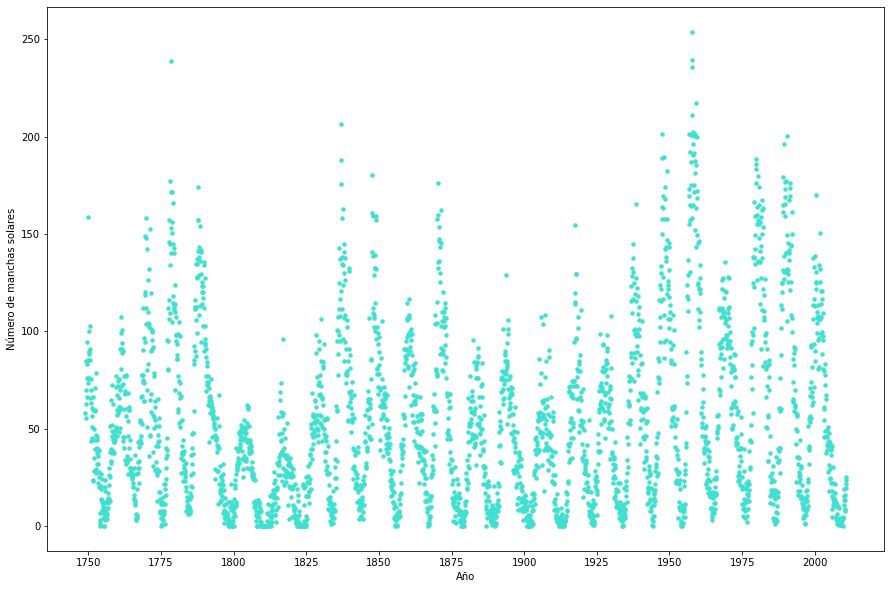

In [43]:
fig, ax = plt.subplots()

ax.scatter(sunspots[:,0], sunspots[:,1],  s = 12, color="turquoise")
ax.set_xlabel("Año")
ax.set_ylabel("Número de manchas solares")
xticks(list(ticks.values()), list(ticks.keys()))
plt.show()

(b) Calcula el promedio móvil. Dibújalo sobre el dibujo original.

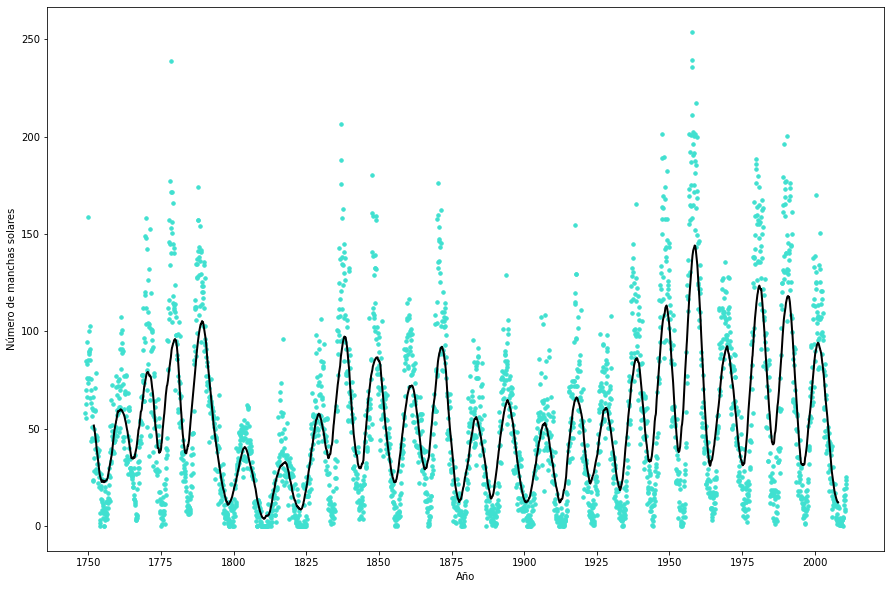

In [42]:
def moving_average(array, n) :
    aux = np.cumsum(array)
    aux[n:] = aux[n:] - aux[:-n]
    return aux[n - 1:] / n

n = 70 # Se puede mover este parámetro del promedio movil, por ejemplo: 10,25,50,80,100
promedio_movil = moving_average(sunspots[:,1], n)

fig, ax = plt.subplots()
ax.scatter(sunspots[:,0], sunspots[:,1], s = 12, color="turquoise")
ax.set_xlabel("Año")
ax.set_ylabel("Número de manchas solares")
xticks(list(ticks.values()), list(ticks.keys()))
ax.plot(sunspots[:,0][int(n/2):-int(n/2)+1], promedio_movil, color = 'black', linewidth = 2)
plt.show()

# Pregunta 6

Utiliza el archivo starts.txt (localizado en la carpeta data), el cual contiene la temperatura y magnitud de varias estrellas en la Vía Lactea. Usa esta información para dibujar un scatter plot del logaritmo del brillo vs. la temperatura (en K). Este diagrama se conoce como diagrama de Hertzsprung-Russell.


In [12]:
stars = np.loadtxt('stars.txt')

(a) Lee el archivo y dibuja los datos tal como vienen en el archivo. Agrega etiquetas y formatea la gráfica de tal manera que tenga calidad de publicación.

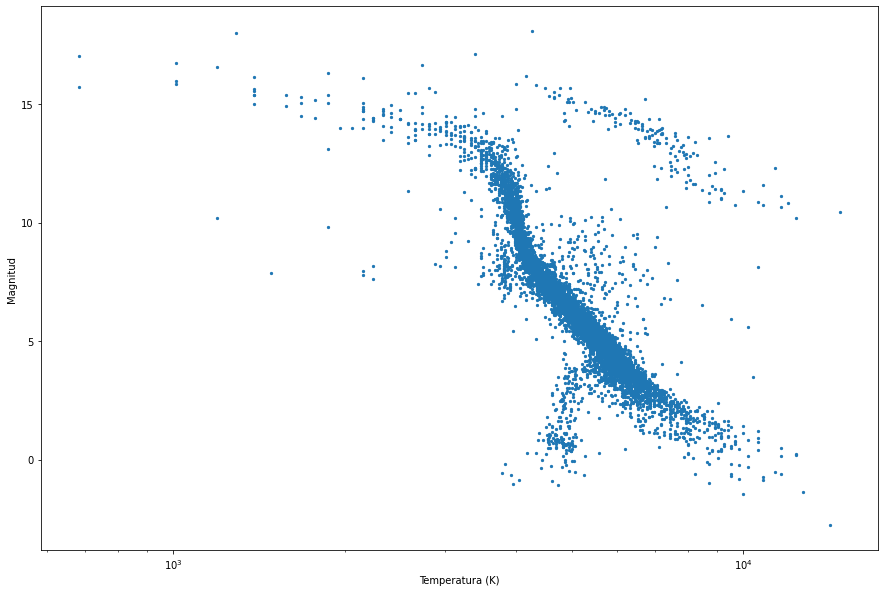

In [13]:
fig, ax = plt.subplots()
ax.scatter(stars[:,0], stars[:,1],  s = 5)
ax.set_xscale('log')
ax.set_xlabel("Temperatura (K)")
ax.set_ylabel("Magnitud")
plt.show()

(b) Ahora usa el xlim() y ylim() para que quede de manera correcta el diagrama. Hay regiones donde las estrellas parece que se aglomeran, ve el archivo de wikipedia y agrega anotaciones para explicarlas.

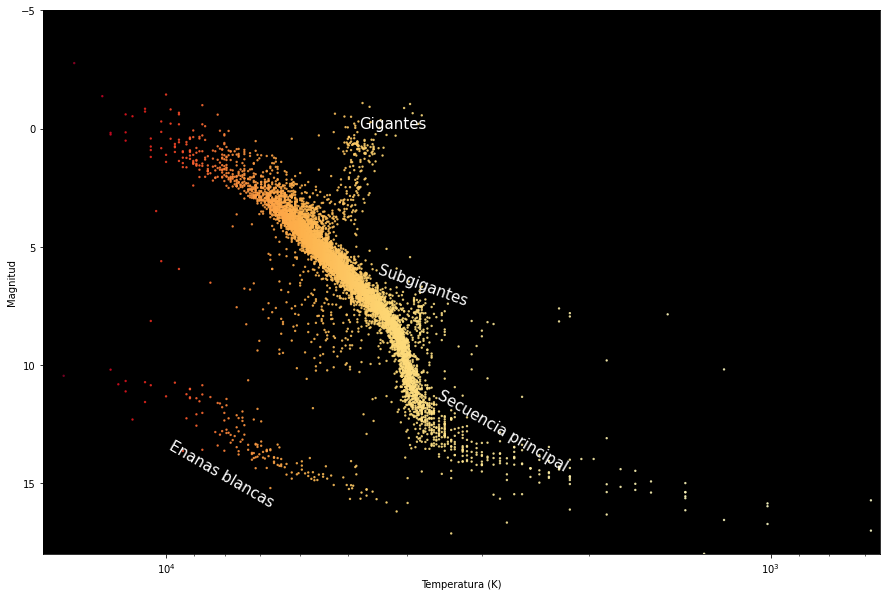

In [14]:
fig, ax = plt.subplots()

ax.scatter(stars[:,0], stars[:,1], s = 2,  c = stars[:,0], cmap = 'YlOrRd', alpha = .8)
ax.set_xscale('log')
ax.set_xlabel("Temperatura (K)")
ax.set_ylabel("Magnitud")
ax.set_xlim(16000, 660) 
ax.set_ylim(18, -5)
ax.set_facecolor('black')

ax.text(10000, 16, 'Enanas blancas', color='white', rotation = -30, size = 15)
ax.text(3600, 14.5, 'Secuencia principal', color='white', rotation = -30, size = 15)
ax.text(4500, 7.5, 'Subgigantes', color='white', rotation = -20, size = 15)
ax.text(4800, 0, 'Gigantes', color='white', rotation = 0, size = 15)
plt.show()